# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Suppress Pandas SettingWithCopyWarning
pd.options.mode.chained_assignment = None

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [104]:
data = pd.read_csv('states_edu.csv')
data.rename({
    'GRADES_PK_G':'ENROLL_PREK',
    'GRADES_KG_G':'ENROLL_KINDER',
    'GRADES_4_G':'ENROLL_4',
    'GRADES_8_G':'ENROLL_8',
    'GRADES_12_G':'ENROLL_12',
    'GRADES_1_8_G':'ENROLL_PRIMARY',
    'GRADES_9_12_G':'ENROLL_HS',
    'GRADES_ALL_G':'ENROLL_ALL',
    'ENROLL':'ENROLL_ALL_EST'
    },
    axis=1,inplace=True)
data

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1710,2019_VIRGINIA,VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,247.0,287.0,224.0,262.0
1711,2019_WASHINGTON,WASHINGTON,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,240.0,286.0,220.0,266.0
1712,2019_WEST_VIRGINIA,WEST_VIRGINIA,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,231.0,272.0,213.0,256.0
1713,2019_WISCONSIN,WISCONSIN,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,242.0,289.0,220.0,267.0


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

In [105]:
data.dropna(subset=['AVG_MATH_8_SCORE'],inplace=True)
data["ENROLL_ALL_EST"] = data["ENROLL_ALL_EST"].fillna(data["ENROLL_ALL"])

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: *Grade 8 Math*

How many years of data are logged in our dataset? 

In [106]:
data.groupby("YEAR").count()

,PRIMARY_KEY,STATE,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,...,ENROLL_4,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
YEAR,,,,,,,,,,,,,,,,,,,,,
1990,39,39,38,0,0,0,0,0,0,0,...,38,38,38,0,0,38,1,39,0,0
1992,43,43,42,42,42,42,42,42,42,42,...,42,42,42,0,0,42,43,43,43,1
1996,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,0
2000,42,42,40,40,40,40,40,40,40,40,...,40,40,40,40,40,40,42,42,1,0
2003,53,53,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,53,53,53,53
2005,53,53,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,53,53,53,53
2007,53,53,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,53,53,53,53
2009,53,53,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,53,53,53,53
2011,53,53,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,53,53,53,53


Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [107]:
data.groupby("STATE").mean().get("AVG_MATH_8_SCORE")

STATE
ALABAMA                 264.166667
ALASKA                  280.000000
ARIZONA                 274.666667
ARKANSAS                269.750000
CALIFORNIA              269.166667
COLORADO                283.181818
CONNECTICUT             282.250000
DELAWARE                277.181818
DISTRICT_OF_COLUMBIA    251.166667
DODEA                   287.200000
FLORIDA                 273.454545
GEORGIA                 272.833333
HAWAII                  269.583333
IDAHO                   281.833333
ILLINOIS                278.909091
INDIANA                 282.250000
IOWA                    283.818182
KANSAS                  286.100000
KENTUCKY                274.333333
LOUISIANA               265.500000
MAINE                   284.000000
MARYLAND                278.916667
MASSACHUSETTS           292.363636
MICHIGAN                276.166667
MINNESOTA               290.000000
MISSISSIPPI             264.454545
MISSOURI                279.272727
MONTANA                 286.818182
NATIONAL      

So OHIO has the higher average outcome score across all years.

Find the average for your outcome score across all states in 2019

In [108]:
data[data.get("YEAR")==2019].get("AVG_MATH_8_SCORE").mean()

281.2641509433962

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [109]:
data.groupby("STATE").max().get("AVG_MATH_8_SCORE")

STATE
ALABAMA                 269.0
ALASKA                  283.0
ARIZONA                 283.0
ARKANSAS                279.0
CALIFORNIA              277.0
COLORADO                292.0
CONNECTICUT             289.0
DELAWARE                284.0
DISTRICT_OF_COLUMBIA    269.0
DODEA                   293.0
FLORIDA                 281.0
GEORGIA                 281.0
HAWAII                  281.0
IDAHO                   287.0
ILLINOIS                285.0
INDIANA                 288.0
IOWA                    286.0
KANSAS                  290.0
KENTUCKY                282.0
LOUISIANA               273.0
MAINE                   289.0
MARYLAND                288.0
MASSACHUSETTS           301.0
MICHIGAN                280.0
MINNESOTA               295.0
MISSISSIPPI             274.0
MISSOURI                286.0
MONTANA                 293.0
NATIONAL                285.0
NEBRASKA                288.0
NEVADA                  278.0
NEW_HAMPSHIRE           296.0
NEW_JERSEY              296.0
NEW_

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [128]:
data_modified = data
data_modified = data_modified.assign(expenditure_per_student = data_modified['TOTAL_EXPENDITURE']/data_modified['ENROLL_ALL_EST'])
data_modified

,PRIMARY_KEY,STATE,YEAR,ENROLL_ALL_EST,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,ENROLL_8,ENROLL_12,ENROLL_PRIMARY,ENROLL_HS,ENROLL_ALL,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE,expenditure_per_student
0,1992_ALABAMA,ALABAMA,1992,731634.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN,3.627221
2,1992_ARIZONA,ARIZONA,1992,673477.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN,5.050774
3,1992_ARKANSAS,ARKANSAS,1992,441490.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN,3.948044
4,1992_CALIFORNIA,CALIFORNIA,1992,5254844.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN,5.164536
5,1992_COLORADO,COLORADO,1992,612635.0,3185173.0,163253.0,1307986.0,1713934.0,3264826.0,1642466.0,...,45025.0,34533.0,NaN,NaN,612635.0,221.0,272.0,217.0,NaN,5.329154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1617,2017_WEST_VIRGINIA,WEST_VIRGINIA,2017,272266.0,NaN,NaN,NaN,NaN,NaN,NaN,...,19958.0,18277.0,NaN,78305.0,272266.0,236.0,273.0,217.0,259.0,NaN
1622,1990_WISCONSIN,WISCONSIN,1990,797621.0,NaN,NaN,NaN,NaN,NaN,NaN,...,56244.0,54562.0,NaN,NaN,797621.0,NaN,274.0,NaN,NaN,NaN
1624,2017_WISCONSIN,WISCONSIN,2017,860753.0,NaN,NaN,NaN,NaN,NaN,NaN,...,62359.0,67026.0,NaN,261916.0,860753.0,240.0,288.0,220.0,269.0,NaN
1629,1990_WYOMING,WYOMING,1990,98226.0,NaN,NaN,NaN,NaN,NaN,NaN,...,7376.0,6245.0,NaN,NaN,98226.0,NaN,272.0,NaN,NaN,NaN


Feature engineering justification: **Create features: expenditure_per_student**

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<AxesSubplot:title={'center':'Distribution of 8th Grade Math Scores'}, ylabel='Frequency'>

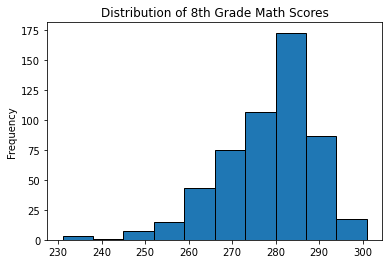

In [133]:
data_modified.AVG_MATH_8_SCORE.plot.hist(title="Distribution of 8th Grade Math Scores", edgecolor="black")

**The distribution of 8th Grade Math Scores mainly follows the Normal Distribution but a little right forwarded. The range of scores is from about 230 to 300. About 90% of students get a score between [265,295].**

Text(0.5, 1.0, '8th Grade Math Score Over Time')

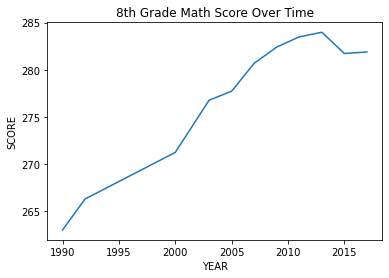

In [129]:
data_modified.groupby('YEAR')["AVG_MATH_8_SCORE"].mean().plot()
plt.ylabel('SCORE')
plt.title('8th Grade Math Score Over Time')

**The distribution of 8th Grade Math Scores over time shows that as the years go on, 8th Grade Math Scores generally presents a growing trend. But the scores dropped off a little bit during 2013-2015.**

**Visualization 2**

Text(0, 0.5, '8th Grade Math Score')

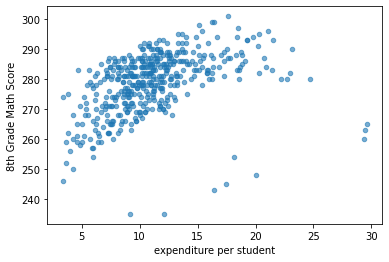

In [132]:
data_modified.plot.scatter(x='expenditure_per_student', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('expenditure per student')
plt.ylabel('8th Grade Math Score')

**From this scatter plot, we can find that with the increasing expenditure per student, there is a trend that average Math score goes higher generally, indicating a positive relationship between expenditure per student and 8th Grade Math Score. This means that if students can get more attention with more education inputs, their math performance can possibly be better.**

Text(0, 0.5, '8th Grade Math Score')

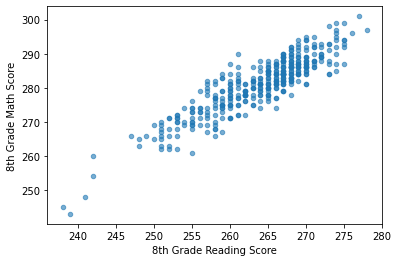

In [135]:
data_modified.plot.scatter(x='AVG_READING_8_SCORE', y='AVG_MATH_8_SCORE', alpha=0.6)
plt.xlabel('8th Grade Reading Score')
plt.ylabel('8th Grade Math Score')

**From this scatter plot, we can find that with the increasing reading score, there is a trend that average Math score goes higher generally, indicating a positive relationship between 8th Grade Reading Score and 8th Grade Math Score. This means that if students with better raeding ability generally do Math problems better.**

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [134]:
from sklearn.model_selection import train_test_split

In [152]:
# X =
# y = 
X = data_modified[['expenditure_per_student','AVG_READING_8_SCORE','AVG_MATH_4_SCORE']].dropna()
y = data_modified.loc[X.index]['AVG_MATH_8_SCORE']

In [153]:
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)
y.fillna(y.median(), inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [154]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [155]:
# create your model here
model = LinearRegression()

In [156]:
model.fit(X_train, y_train)

LinearRegression()

In [167]:
y_pred = model.predict(X_test)

In [168]:
model.score(X_test, y_test)

0.9221674266946616

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

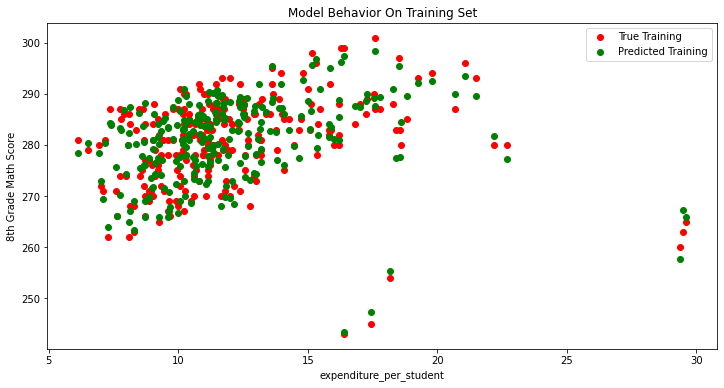

In [171]:
col_name = 'expenditure_per_student'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('8th Grade Math Score')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

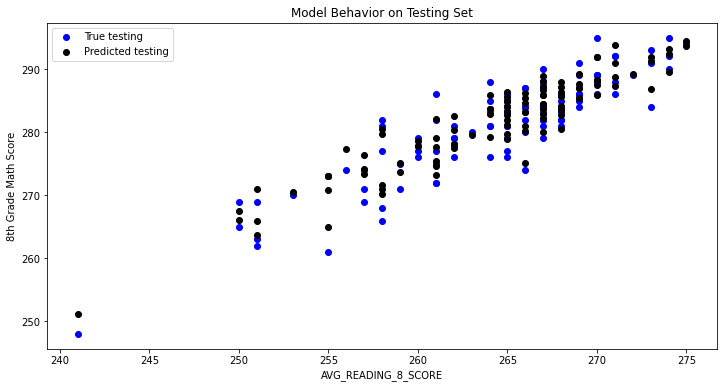

In [170]:
col_name = 'AVG_READING_8_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('8th Grade Math Score')
plt.title("Model Behavior on Testing Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

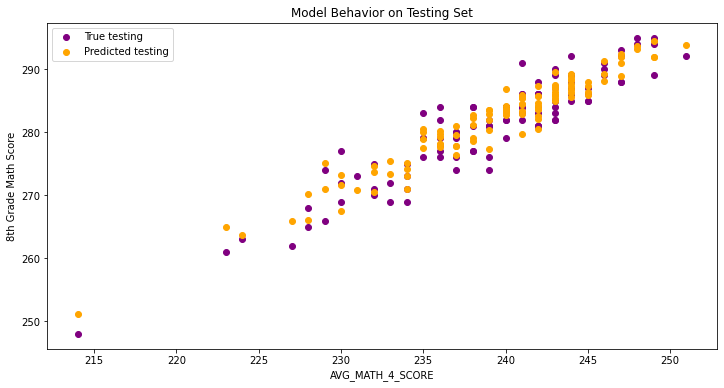

In [169]:
col_name = 'AVG_MATH_4_SCORE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "purple")
plt.scatter(X_test[col_name], model.predict(X_test), color = "orange")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('8th Grade Math Score')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

**In general, the model we get gives us quite precise prediction close to actural data. It has a R^2 of about 0.92, very close to one, indicating the three predictors: expenditure_per_student ,8th Grade Reading Score and 4th Grade Math Score, follows a linear regression to form 8th Grade Math Score. And The predictde testing results are all close to true testings.**